In [44]:
%matplotlib widget

import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datasets import load_dataset
import mplcursors;

In [27]:
# load codeforces dataset
ds = load_dataset("open-r1/codeforces", "default",split="train[:1000]") 

'Exploration plan'

In [33]:
n = 1000 #First n elements taken from database

texts = ds  ['description'][:n]
ratings = np.array(ds["rating"][:n])
ids = ds["id"][:n]  
tags = ds["tags"][:n]  # each element is a list of tags
titles = ds["title"][:n] 

In [68]:
# characters to remove
remove_chars = "$(){}_^\\"

# make translation table (maps each char -> None)
trans_table = str.maketrans('', '', remove_chars)

# if ds is a Python list of strings

#texts_clean = [s.translate(trans_table) for s in ]
texts_clean = [s.translate(trans_table) for s in map(lambda x: str(x[0])+x[1],zip(tags, texts))]

In [69]:
def shorten(s, max_words=10):
    return " ".join(s.split()[:max_words]) + "..."

In [70]:
texts_short = [shorten(t) for t in texts_clean]

In [71]:
# Load the Universal Sentence Encoder from TensorFlow Hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4");

In [72]:
# Get embeddings
embeddings = embed(texts_clean).numpy()

In [73]:
# Apply t-SNE (clustering algorithm)
tsne = TSNE(n_components=2, random_state=42, perplexity=40) 
reduced_embeddings = tsne.fit_transform(embeddings)

In [74]:
# apply k means clustering
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(reduced_embeddings)
kmeans_labels = kmeans.labels_


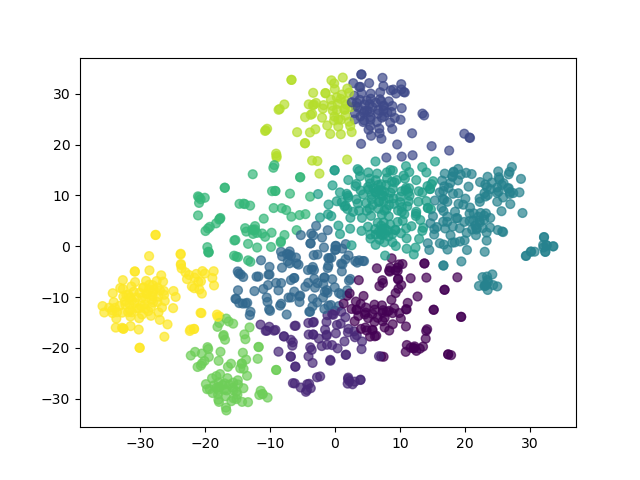

In [75]:
#Plot 

fig, ax = plt.subplots()
sc = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c= kmeans_labels,
    s=40,
    alpha=0.7
)

cursor = mplcursors.cursor(sc)

def on_add(sel):
    idx = sel.index
    sel.annotation.set(text=tags[idx])   # show the tag
    sel.annotation.get_bbox_patch().set(fc="lightyellow", alpha=0.8)

cursor.connect("add", on_add)

plt.show()

